In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

In [5]:
y = y.reshape(-1, 1)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

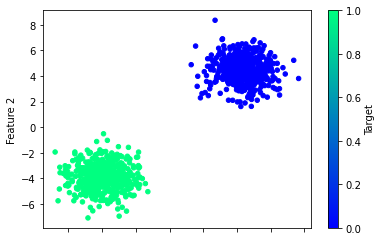

In [8]:
# Create a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plot the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# Create the scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
neuron = Sequential()

In [16]:
number_inputs = 2
number_hidden_nodes = 3

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [17]:
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))

In [18]:
# Display model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [19]:
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Fitting the model
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.4965 - accuracy: 0.9960
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.9973
Epoch 3/100
24/24 [==============================] - 0s 923us/step - loss: 0.4518 - accuracy: 0.9973
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.9973
Epoch 5/100
24/24 [==============================] - 0s 988us/step - loss: 0.4151 - accuracy: 0.9987
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.9987
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.9987
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 955us/step - loss: 0.3590 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 998us/step - loss: 0.3477 - accuracy: 1.0000
E

<AxesSubplot:>

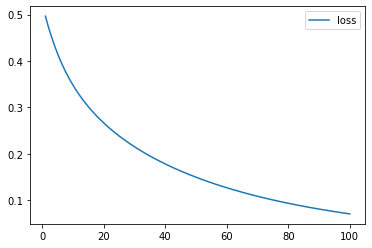

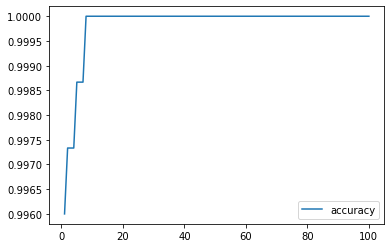

In [21]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

# Plot the accuracy
df.plot(y="accuracy")


In [22]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0659 - accuracy: 1.0000 - 217ms/epoch - 27ms/step
Loss: 0.0659172385931015, Accuracy: 1.0


In [23]:
# Create 10 new samples of dummy data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=1)

# Make predictions
predictions = (neuron.predict(new_X) > 0.5).astype("int32") 

In [24]:
# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": new_y})

# Display sample data
results.head(10)

,predictions,actual
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,1,0
6,1,0
7,1,1
8,1,0
9,0,0
